## Evaluating tests

Evaluating various types of tests, both for their power and their constraints.

In [4]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pvalues
%matplotlib inline

Some code to examine p-values.

In [22]:
data = stats.uniform(0, 1).rvs(100)

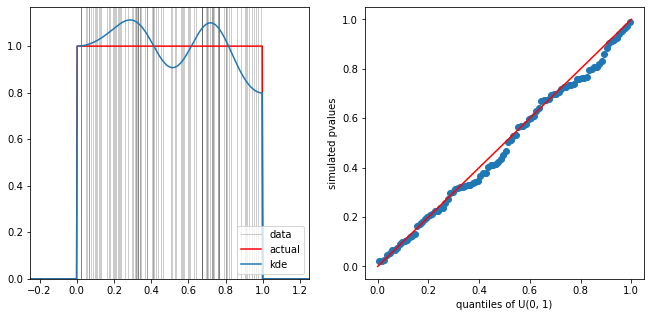

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(11, 5))
pvalues.plot_pvalues(ax[0],
                     data)
pvalues.plot_quantiles(ax[1],
                       data)

### alpha-beta plots

An alpha-beta (my term) plot takes, as input, two random variables, a sample size, and a test statistic that operates on two samples. It is parameterized by the critical value. For each critical value, it plots the alpha (false-positive rate) for rejecting that two samples taken from the first are from the same distribution, against the beta (false negative rate) that samples taken form the each fail to reject the null.

In [211]:
def alpha_beta_plot(ax,
                    dist1, dist2,
                    sample_size,
                    statistic,
                    n_samples=10):
    data1 = dist1.rvs((sample_size, n_samples))
    data2 = dist2.rvs((sample_size, n_samples))
    stats_11 = np.zeros((n_samples, n_samples))
    stats_12 = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            stats_11[i, j] = statistic(data1[:, i], data1[:, j])[0]
            stats_12[i, j] = statistic(data1[:, i], data2[:, j])[0]
    stats_11 = stats_11[np.tril_indices(n_samples, -1)]
    stats_12 = stats_12.flatten()
    merged = np.concatenate([stats_11, stats_12])
    merged.sort()
    
    alphas = np.zeros_like(merged)
    betas = np.zeros_like(merged)
    for i, crit in enumerate(merged):
        alphas[i] = ((crit > stats_11).sum()/len(stats_11))
        betas[i] = ((crit < stats_12).sum()/len(stats_12))
    ax.scatter(alphas, betas)
    ax.set_xlabel("alpha")
    ax.set_ylabel("beta")
    return ((alphas < betas[:, None]).mean() +
            (alphas == betas[:, None]).mean()/2) 

0.6150485408440621

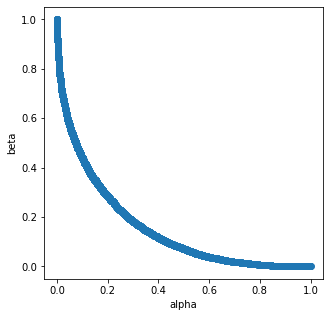

In [219]:
fig, ax = plt.subplots(figsize=(5, 5))

alpha_beta_plot(ax,
                stats.norm(0, 1),
                stats.norm(0.5, 1),
                20,
                stats.ttest_ind,
                100)

0.34125159226406865

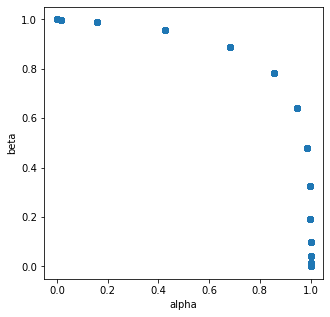

In [222]:
fig, ax = plt.subplots(figsize=(5, 5))

alpha_beta_plot(ax,
                stats.norm(0, 1),
                stats.norm(1, 1),
                20,
                stats.kstest,
                100)

In [36]:
a[np.tril_indices(4, -1)].sort()

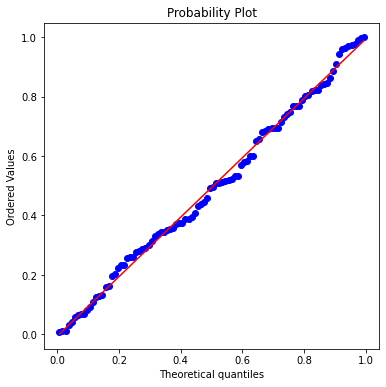

In [15]:
fig, ax = plt.subplots(figsize=(6,6))
#ax.plot([0, 1], [0, 1])
stats.probplot(data,
               dist=stats.uniform(0, 1),
               fit=False,
               plot=ax);

In [112]:
import scipy

In [113]:
scipy.__version__

'1.4.1'

In [14]:
import scipy

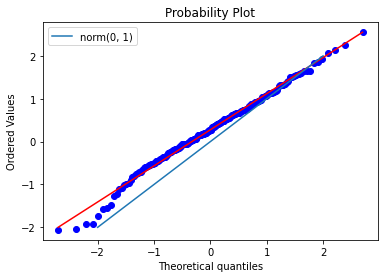

In [33]:
data = scipy.stats.norm(0.3, 0.8).rvs(200)
# Do these data come from norm(0, 1)?
fig, ax = plt.subplots()
scipy.stats.probplot(data,
                     dist=stats.norm(0, 1),
                     fit=False,
                     plot=ax)
ax.plot([-2, 2], [-2, 2],
        label="norm(0, 1)")
ax.legend()

In [30]:
import sys, scipy, numpy; print(scipy.__version__, numpy.__version__, sys.version_info)

1.6.0 1.19.2 sys.version_info(major=3, minor=9, micro=1, releaselevel='final', serial=0)


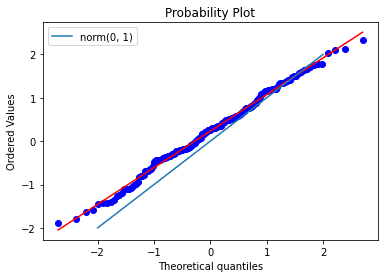

In [1]:
import matplotlib.pyplot as plt
from scipy import stats

data = stats.norm(0.3, 0.8).rvs(200)
# Do these data come from norm(0, 1)?
fig, ax = plt.subplots()
stats.probplot(data,
               dist=stats.norm(0, 1),
               fit=False,
               plot=ax)
ax.plot([-2, 2], [-2, 2],
        label="norm(0, 1)")
ax.legend()

In [2]:
stats.probplot(data,
               dist=stats.norm(0, 1),
               fit=False)

(array([-2.70069508, -2.39117927, -2.21476595, -2.08844273, -1.98865134,
        -1.90545091, -1.83366817, -1.77025272, -1.7132485 , -1.66132288,
        -1.61352545, -1.56915347, -1.52767212, -1.48866446, -1.45179889,
        -1.41680716, -1.38346902, -1.35160134, -1.32105008, -1.29168444,
        -1.26339229, -1.23607681, -1.20965371, -1.18404921, -1.1591983 ,
        -1.13504337, -1.11153314, -1.08862177, -1.06626803, -1.04443478,
        -1.02308837, -1.00219826, -0.9817366 , -0.96167793, -0.94199891,
        -0.9226781 , -0.90369573, -0.88503353, -0.86667459, -0.84860322,
        -0.83080482, -0.8132658 , -0.79597346, -0.77891592, -0.76208206,
        -0.74546144, -0.72904425, -0.71282124, -0.69678371, -0.68092342,
        -0.6652326 , -0.64970389, -0.63433029, -0.61910517, -0.60402223,
        -0.58907547, -0.57425918, -0.55956789, -0.5449964 , -0.53053972,
        -0.51619308, -0.50195192, -0.48781183, -0.47376862, -0.45981823,
        -0.44595676, -0.43218046, -0.41848569, -0.4